## Data Preproccessing

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import load_model

### how to run and import preproccessed data

There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


/Users/mimita/Documents/repos/SpamFilter/datapreprocessing.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['v1', 'v2']), 1, inplace=True)


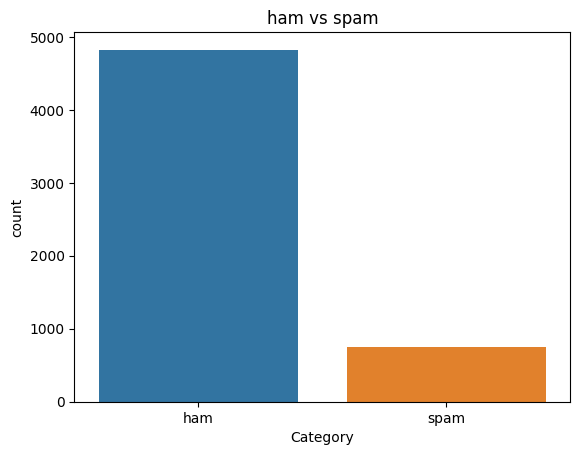

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
X_train: (4456,)


/Users/mimita/Documents/repos/SpamFilter/datapreprocessing.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
/Users/mimita/Documents/repos/SpamFilter/datapreprocessing.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


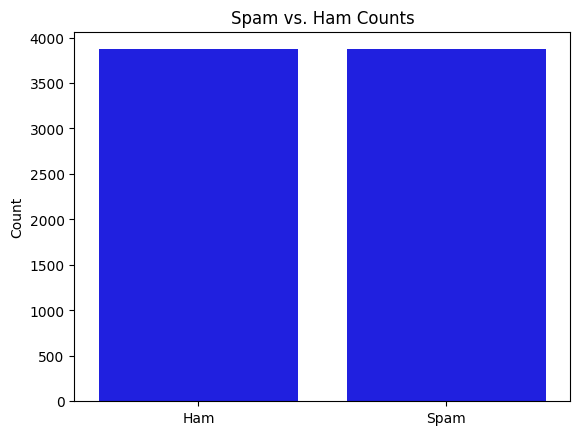

In [5]:
from utils import get_cleaned_data, generate_model_output
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

### Neural Network with SGD optimizer

In [6]:
# model inspired from https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.optimizers import SGD

LR = .01
MOMENTUM = .5
#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= SGD(lr=LR, momentum=MOMENTUM), metrics=['accuracy'] )

print(lstm.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
__________________________________________________

/opt/homebrew/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17


2022-12-09 23:43:24.769785: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 15s 747ms/step - loss: 0.6921 - accuracy: 0.6418 - val_loss: 0.6889 - val_accuracy: 0.8404
Epoch 2/17
16/16 [==============================] - 10s 573ms/step - loss: 0.6915 - accuracy: 0.5289 - val_loss: 0.6886 - val_accuracy: 0.8332
Epoch 3/17
16/16 [==============================] - 7s 428ms/step - loss: 0.6911 - accuracy: 0.6488 - val_loss: 0.6871 - val_accuracy: 0.8565
Epoch 4/17
16/16 [==============================] - 7s 448ms/step - loss: 0.6906 - accuracy: 0.5783 - val_loss: 0.6862 - val_accuracy: 0.8583
Epoch 5/17
16/16 [==============================] - 7s 421ms/step - loss: 0.6901 - accuracy: 0.5790 - val_loss: 0.6853 - val_accuracy: 0.8628
Epoch 6/17
16/16 [==============================] - 7s 430ms/step - loss: 0.6897 - accuracy: 0.5652 - val_loss: 0.6852 - val_accuracy: 0.8511
Epoch 7/17
16/16 [==============================] - 7s 456ms/step - loss: 0.6890 - accuracy: 0.7152 - val_loss: 0.6860 - val_accuracy: 0.8278
Epoch 8/17
16/1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


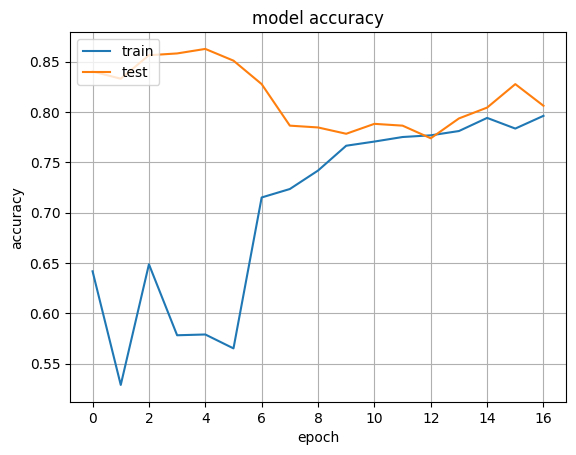

In [8]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

### Neural Network with adam optimizer

In [9]:
from keras.layers import Dense, Embedding, Dropout
from keras.layers import Bidirectional

#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'] )

print(lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
________________________________________________

In [10]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17
16/16 [==============================] - 11s 520ms/step - loss: 0.6816 - accuracy: 0.6363 - val_loss: 0.5819 - val_accuracy: 0.8852
Epoch 2/17
16/16 [==============================] - 7s 416ms/step - loss: 0.5168 - accuracy: 0.8061 - val_loss: 0.3544 - val_accuracy: 0.8673
Epoch 3/17
16/16 [==============================] - 7s 464ms/step - loss: 0.3492 - accuracy: 0.8695 - val_loss: 0.2286 - val_accuracy: 0.9157
Epoch 4/17
16/16 [==============================] - 6s 405ms/step - loss: 0.2823 - accuracy: 0.8967 - val_loss: 0.2278 - val_accuracy: 0.9130
Epoch 5/17
16/16 [==============================] - 7s 453ms/step - loss: 0.2262 - accuracy: 0.9231 - val_loss: 0.2075 - val_accuracy: 0.9220
Epoch 6/17
16/16 [==============================] - 9s 589ms/step - loss: 0.1837 - accuracy: 0.9408 - val_loss: 0.1524 - val_accuracy: 0.9417
Epoch 7/17
16/16 [==============================] - 8s 467ms/step - loss: 0.1511 - accuracy: 0.9551 - val_loss: 0.1085 - val_accuracy: 0.9659
Epoch

In [11]:
# save model 
lstm.save('lstmModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('lstmModel.h5')
savedModel.summary()

Model Saved!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
___________________________________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


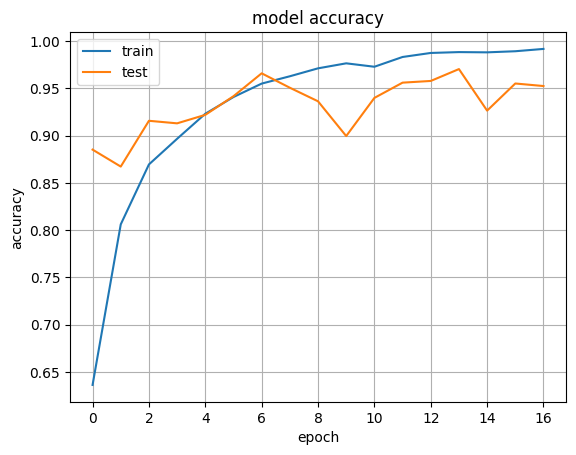

In [12]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [13]:
# test our model
y_pred=lstm.predict(X_test)
print(y_pred)
y_pred=(y_pred>0.5) # assign true(spam) if > .5
print(y_pred)

35/35 [==============================] - 1s 12ms/step
[[0.00175319]
 [0.00129598]
 [0.9931192 ]
 ...
 [0.03394808]
 [0.05068143]
 [0.11781561]]
[[False]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]


Classification Report
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       953
           1       0.77      0.97      0.86       162

    accuracy                           0.95      1115
   macro avg       0.88      0.96      0.91      1115
weighted avg       0.96      0.95      0.95      1115
 

Accuracy Score: 0.9524663677130045


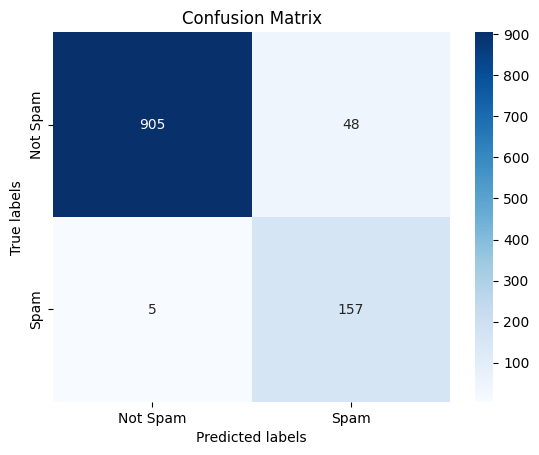

In [14]:
generate_model_output(y_test,y_pred)